# Imports and Functions

In [22]:
from sunlab.fortran_src.aae_flib_tfnb import *

In [1]:
from sunlab.environment.base.cpu import *
from sunlab.environment.base.extras import *
from sunlab.globals import FILES
from sunlab.sunflow import *
from sunlab.common.mathlib.random_walks import get_gaussian_random_walks

In [42]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

In [27]:
def get_trajectory_msds(trajectory, lag_count=10):
    """trajectories: (T, D)"""
    from numpy import asfortranarray
    from sunlab.fortran_src.aae_flib_tfnb import mmsds
    X = asfortranarray(trajectory)
    return mmsds(X, lag_count)

def get_trajectories_msds(trajectories, lag_count=10):
    """trajectories: (T, N, D)"""
    from numpy import asfortranarray, array
    from sunlab.fortran_src.aae_flib_tfnb import mmsds
    lags = []
    X = asfortranarray(trajectories)
    for seq in range(X.shape[1]):
        lags.append(mmsds(X[:,seq,:], lag_count))
    return array(lags).T

# Setup

In [118]:
_R = np.inf
_R = 1
gaussian_random_walk = get_gaussian_random_walks(N=20, T=20, D=13, R=_R) + 0.5
gaussian_random_walk.shape

(20, 20, 13)

In [119]:
pca_model = PCA(2)
Y_pca = pca_model.fit_transform(gaussian_random_walk.reshape((-1,13)))
Y_pca = Y_pca.reshape([gaussian_random_walk.shape[i] for i in [0,1]] + [-1,])
Y_pca.shape

(20, 20, 2)

In [120]:
kpca_model = KernelPCA(2, kernel='poly')
Y_kpca = kpca_model.fit_transform(gaussian_random_walk.reshape((-1,13)))
Y_kpca = Y_kpca.reshape([gaussian_random_walk.shape[i] for i in [0,1]] + [-1,])
Y_kpca.shape

(20, 20, 2)

In [121]:
tsne_model = TSNE(2)
Y_tsne = tsne_model.fit_transform(gaussian_random_walk.reshape((-1,13)))
Y_tsne = Y_tsne.reshape([gaussian_random_walk.shape[i] for i in [0,1]] + [-1,])
Y_tsne.shape

/home/physics/cunnichr/.conda/envs/tfnb/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/physics/cunnichr/.conda/envs/tfnb/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(20, 20, 2)

In [122]:
f_MSD = lambda x, a, b: a * x ** b

In [123]:
grw_traj_msds = get_trajectories_msds(gaussian_random_walk, lag_count=15).T
pca_traj_msds = get_trajectories_msds(Y_pca, lag_count=15).T
kpca_traj_msds = get_trajectories_msds(Y_kpca, lag_count=15).T
tsne_traj_msds = get_trajectories_msds(Y_tsne, lag_count=15).T

In [124]:
grw_parameters = []
for idx in range(grw_traj_msds.shape[0]):
    X = range(grw_traj_msds.shape[1])
    Y = grw_traj_msds[idx,:]
    parameter = curve_fit(f_MSD, X, Y)[0]
    grw_parameters.append(parameter)

grw_parameters = np.array(grw_parameters)
grw_parameters.mean(axis=0)[-1]

0.4855710362737808

In [125]:
pca_parameters = []
for idx in range(pca_traj_msds.shape[0]):
    X = range(pca_traj_msds.shape[1])
    Y = pca_traj_msds[idx,:]
    parameter = curve_fit(f_MSD, X, Y)[0]
    pca_parameters.append(parameter)

pca_parameters = np.array(pca_parameters)
pca_parameters.mean(axis=0)[-1]

0.5974400860840807

In [126]:
kpca_parameters = []
for idx in range(kpca_traj_msds.shape[0]):
    X = range(kpca_traj_msds.shape[1])
    Y = kpca_traj_msds[idx,:]
    parameter = curve_fit(f_MSD, X, Y)[0]
    kpca_parameters.append(parameter)

kpca_parameters = np.array(kpca_parameters)
kpca_parameters.mean(axis=0)[-1]

0.5942085067724623

In [127]:
tsne_parameters = []
for idx in range(tsne_traj_msds.shape[0]):
    X = range(tsne_traj_msds.shape[1])
    Y = tsne_traj_msds[idx,:]
    parameter = curve_fit(f_MSD, X, Y)[0]
    tsne_parameters.append(parameter)

tsne_parameters = np.array(tsne_parameters)
tsne_parameters.mean(axis=0)[-1]

0.9263647060532347

# Runtime Parameters

In [128]:
SAVE_EXTRAS = False

In [129]:
g_Base = lambda *args: DIR_ROOT + "Figures/"

# Plots

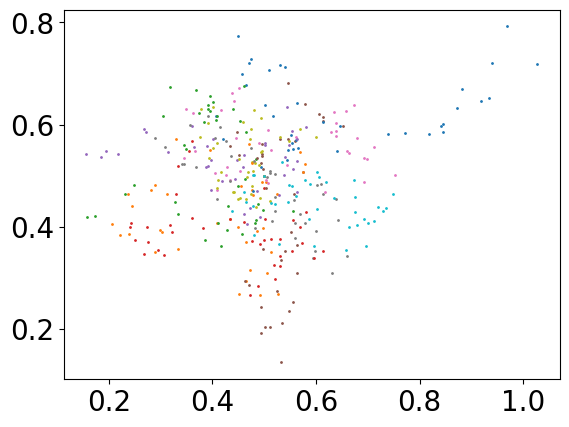

In [130]:
[plt.scatter2d(gaussian_random_walk[:,n,:2], s=1) for n in range(gaussian_random_walk.shape[1])]
_ = _

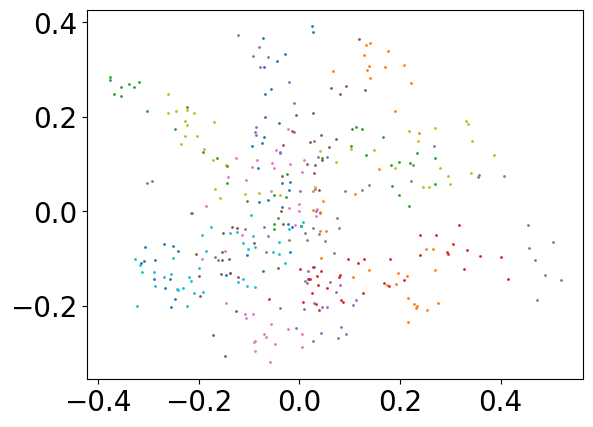

In [131]:
[plt.scatter2d(Y_pca[:,n,:2], s=1) for n in range(gaussian_random_walk.shape[1])]
_ = _

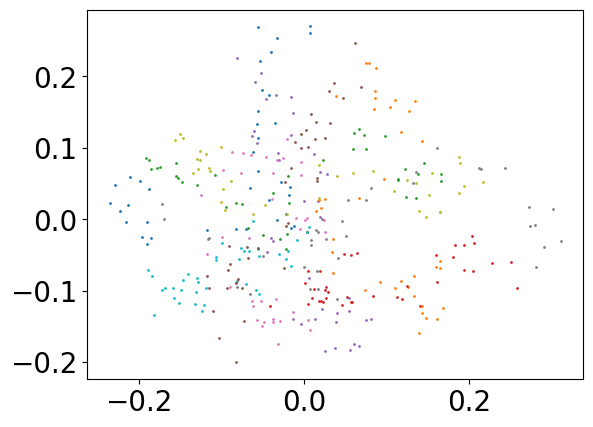

In [132]:
[plt.scatter2d(Y_kpca[:,n,:2], s=1) for n in range(gaussian_random_walk.shape[1])]
_ = _

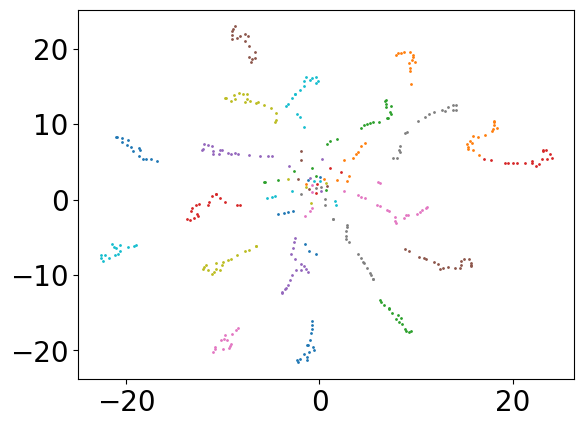

In [133]:
[plt.scatter2d(Y_tsne[:,n,:2], s=1) for n in range(gaussian_random_walk.shape[1])]
_ = _

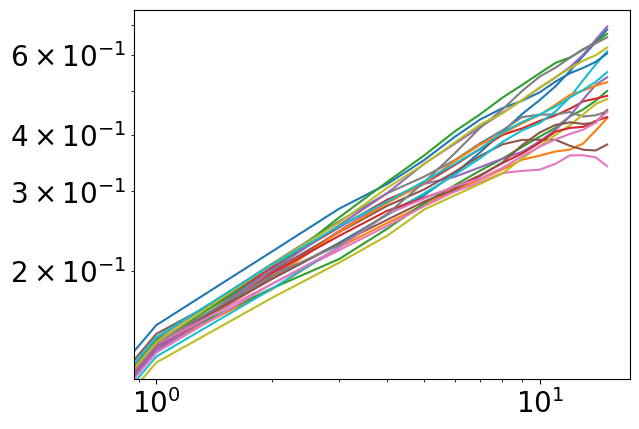

In [134]:
plt.loglog(grw_traj_msds.T)
_ = _

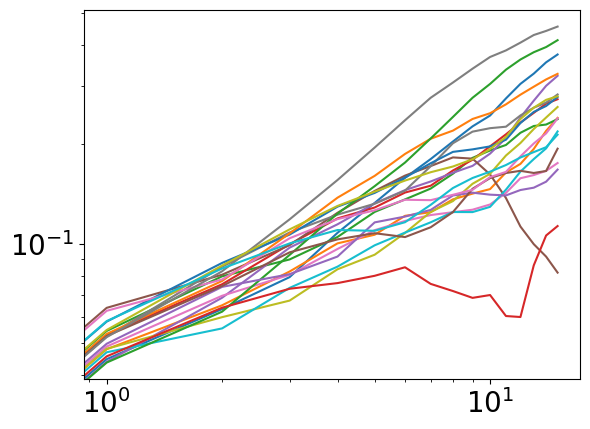

In [135]:
plt.loglog(pca_traj_msds.T)
_ = _

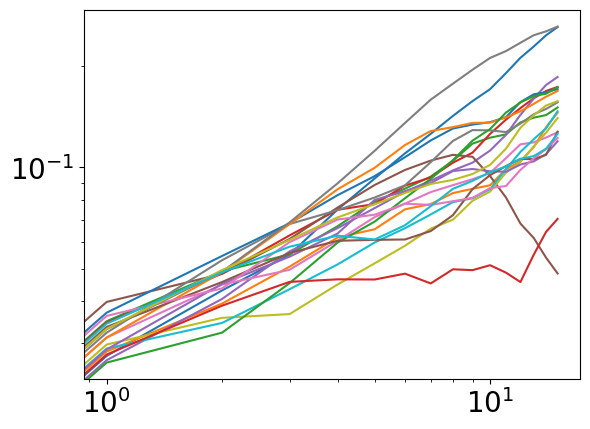

In [136]:
plt.loglog(kpca_traj_msds.T)
_ = _

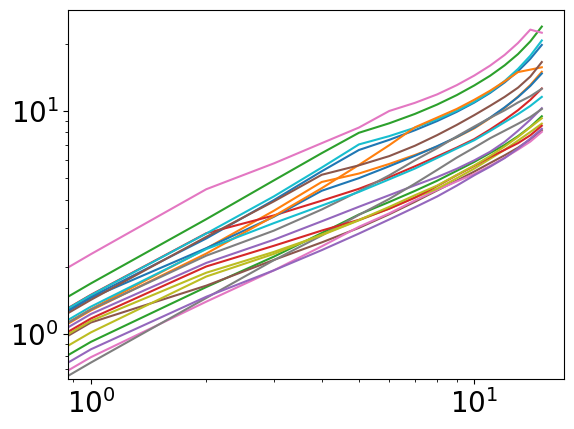

In [137]:
plt.loglog(tsne_traj_msds.T)
_ = _

Text(0, 0.5, 'MSD Exponent')

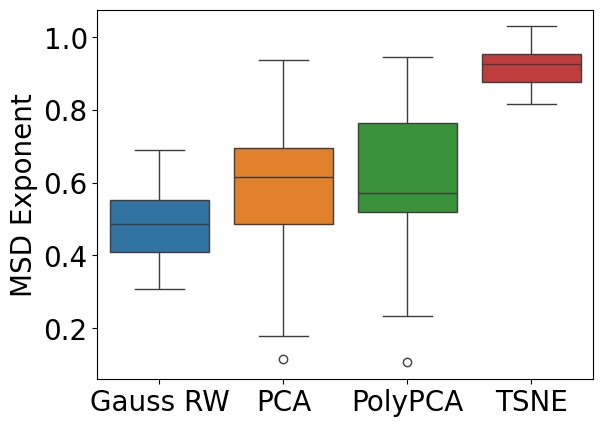

In [138]:
import seaborn as sns
sns.boxplot(data=[grw_parameters[:,1], pca_parameters[:,1], kpca_parameters[:,1], tsne_parameters[:,1]])
plt.xticks([0,1,2,3],['Gauss RW', 'PCA', 'PolyPCA', 'TSNE'])
plt.ylabel('MSD Exponent')

# END